In [26]:
import sys
import importlib
import pandas as pd
import numpy as np
import geopandas
import seaborn
sys.path.insert(0, "/home/mqueyrel/Documents/deseabel/deseabel/ocean_ecosystem")
import noise_impactor
import simulator
import marine_fauna
import marine_map
import matrix_conversion
importlib.reload(matrix_conversion)
importlib.reload(marine_map)
importlib.reload(marine_fauna)
importlib.reload(simulator)
importlib.reload(noise_impactor)

from noise_impactor import FishingBoat, Cargo, PileDriving
from simulator import Simulator
from marine_fauna import Fish
from marine_map import MarineMap
from matrix_conversion import *

## Create 3 boats and one fish species

In [35]:
boat1 = FishingBoat(lat=45.20, lon=-5.2, speed=10, length=10)
boat2 = FishingBoat(lat=44.85, lon=-4.9, speed=15, length=13)
boat3 = FishingBoat(lat=44.5, lon=-5.2, speed=17, length=5)

fish = Fish("../../data/fish.geojson")

## Initialize a marine map with specific shapes

In [36]:
# Example
width = 300000
height = 300000
step = 1000
longitude_west = -2.40953
latitude_north = 46.41813
longitude_west = -6.40953
latitude_north = 46.41813

marine_map = MarineMap(width, height, step, longitude_west, latitude_north)

## Initialize a Simulator

In [37]:
simu = Simulator(marine_map, list_noise_impactor=[boat1, boat2], list_marine_fauna=[])

# Add manually other objects
simu.add_noise_impactor(boat3)
simu.add_marine_fauna(fish)

#### Plot the heatmap of the noise from the map

<AxesSubplot: >

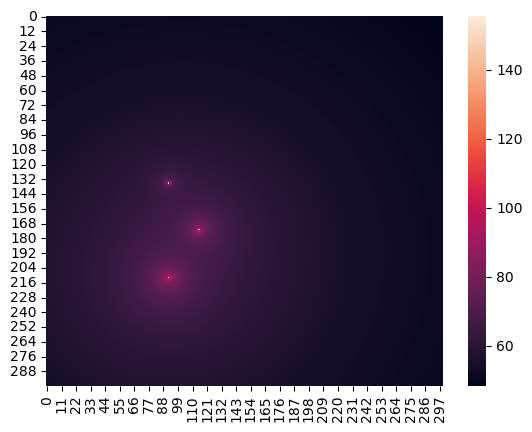

In [38]:
seaborn.heatmap(marine_map.matrix_decibel)

## Compute the marine fauna impact for the fish species

In [39]:
simu.update_marine_fauna_impact("fish")

- Plot the corresponding quantified matrix of the different levels of noise impacts
- Print the corresponding array impact 

In [ ]:
seaborn.heatmap(marine_map.matrix_decibel_impact_quantified)

<AxesSubplot: >

In [34]:
fish.array_impact

array([1., 0., 0., 0., 0., 0.])

<AxesSubplot: >

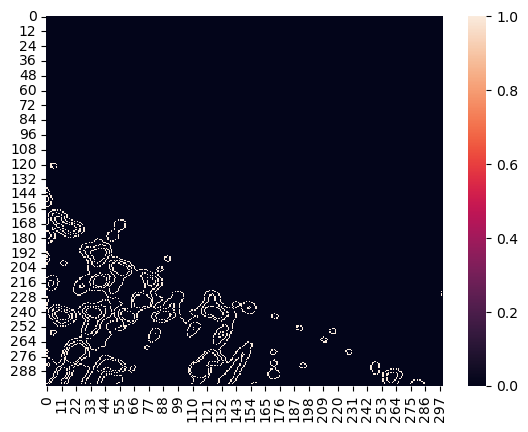

In [177]:
coords = marine_map.get_coord_xy_from_geopandas(fish.spot_gpd)
matrix_res = np.zeros(marine_map.matrix_decibel.shape)

matrix_res[coords[:, 0], coords[:, 1]] = 1

seaborn.heatmap(matrix_res)

In [ ]:
length_boat=100
boat_speed=20


SLspeed=[];
SLi=[];
dl=length_boat^1.15/3643;
clear Fc SL
D16 = 2^(1/6);
D13 = 2^(1/3);
Fc(1) = 12.4;
f=Fc(1);
df=8.1;
SLs0=-10*log10(10.^(-1.06*log10(f)-14.34)+10.^(3.32*log10(f)-24.425));  

for ii = 1:(16)
    Fc(ii+1) = Fc(ii) * D13;
    f=Fc(ii+1);
    SLs0=-10*log10(10.^(-1.06*log10(f)-14.34)+10.^(3.32*log10(f)-24.425));
    if f<=28.4
        df=8.1;
    else
        df=22.3-9.77*log10(f);
    end
    SLi(ii)=(SLs0)+60*log10(boat_speed/12)+20*log10(length_boat/300)+df*dl+3;
end

SL=mean(SLi)

In [100]:
def set_sound_level(length, speed):
    SLi = []
    dl = length ** 1.15 / 3643
    D13 = 2 ** (1/3)
    Fc = [12.4]
    f = Fc[0]
    df = 8.1
    SLs0 = -10 * np.log10(10. ** (-1.06 * np.log10(f) - 14.34) + 10.**(3.32 * np.log10(f)-24.425))
    for ii in range(16):
        Fc.append(Fc[ii] * D13)
        f=Fc[ii+1]
        SLs0= -10 * np.log10 (10. ** (-1.06 * np.log10(f) - 14.34) + 10.**(3.32 * np.log10(f) - 24.425))
        if f <= 28.4:
            df = 8.1
        else:
            df = 22.3 - 9.77 * np.log10(f)
        SLi.append((SLs0) + 60 * np.log10(speed / 12) + 20 * np.log10(length / 300) + df * dl + 3)
    return np.mean(SLi)

def set_sound_level2(flotation_surface, speed):
    reference_sound_power = 10**-12 # Watts
    reference_flotation_surface = 1 # square meter

    boat_sound_power = 0.11 * speed + 0.0053 * flotation_surface # Watts
    return 10 * np.log10(boat_sound_power / reference_sound_power) + 2 * np.log10(flotation_surface / reference_flotation_surface)

In [185]:
speed = 5
length = 5
flotation_surface = 2/3 * length * length // 3

In [186]:
set_sound_level(length, speed)

105.51346911047165

In [180]:
set_sound_level2(flotation_surface, speed)

125.70764500239915